## **Лабораторная работа №5**

**Бизнес-цели:**

Улучшение финансового планирования

Использование подходов кластеризации для предсказания объемов продаж и доходов по различным сегментам

**Столбцы датасета и их пояснение:**

**Date** - Дата, на которую относятся данные. Эта характеристика указывает конкретный день, в который происходила торговля акциями Walmart.

**Open** - Цена открытия. Стоимость акций Walmart в начале торгового дня. Это важный показатель, который показывает, по какой цене начались торги в конкретный день, и часто используется для сравнения с ценой закрытия для определения дневного тренда.

**High** - Максимальная цена за день. Наибольшая цена, достигнутая акциями Walmart в течение торгового дня. Эта характеристика указывает, какой была самая высокая стоимость акций за день.

**Low** - Минимальная цена за день. Наименьшая цена, по которой торговались акции Walmart в течение дня.

**Close** - Цена закрытия. Стоимость акций Walmart в конце торгового дня. Цена закрытия — один из основных показателей, используемых для анализа акций, так как она отображает итоговую стоимость акций за день и часто используется для расчета дневных изменений и трендов на длительных временных периодах.

**Adj Close** - Скорректированная цена закрытия. Цена закрытия, скорректированная с учетом всех корпоративных действий.

**Volume** - Объем торгов. Количество акций Walmart, проданных и купленных в течение дня. 

**Выгружаем данные**

In [1]:
import pandas as pd

df = pd.read_csv("..//static//csv//WMT.csv").head(15000)

print(df.head())
print(df.columns)
display(df.head(15))
print(df.isnull().sum())  

       Date       Open       High        Low      Close  Adj Close    Volume
0  1/3/2000  22.791668  23.000000  21.833332  22.270832  14.469358  25109700
1  1/4/2000  21.833332  21.937500  21.395832  21.437500  13.927947  20235300
2  1/5/2000  21.291668  21.458332  20.729168  21.000000  13.643703  21056100
3  1/6/2000  21.000000  21.520832  20.895832  21.229168  13.792585  19633500
4  1/7/2000  21.500000  22.979168  21.500000  22.833332  14.834813  23930700
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Date       Open       High        Low      Close  Adj Close    Volume
0    1/3/2000  22.791668  23.000000  21.833332  22.270832  14.469358  25109700
1    1/4/2000  21.833332  21.937500  21.395832  21.437500  13.927947  20235300
2    1/5/2000  21.291668  21.458332  20.729168  21.000000  13.643703  21056100
3    1/6/2000  21.000000  21.520832  20.895832  21.229168  13.792585  19633500
4    1/7/2000  21.500000  22.979168  21.500000  22.833332  14.834813  23930700
5   1/10/2000  22.416668  22.500000  21.875000  22.416668  14.564112  20142900
6   1/11/2000  22.354168  22.583332  21.875000  22.083332  14.347544  14829900
7   1/12/2000  22.062500  22.250000  21.687500  21.687500  14.090372  12255000
8   1/13/2000  22.000000  22.041668  21.666668  21.708332  14.103909  15063000
9   1/14/2000  21.333332  21.979168  21.333332  21.500000  13.968553  18936600
10  1/18/2000  21.062500  22.145832  21.020832  21.854168  14.198661  19326600
11  1/19/2000  21.750000  21.937500  21.333332  21.354168  13.873807  14459700
12  1/20/2000  21.479168  21.500000  20.833332  21.125000  13.724912  17214300
13  1/21/2000  21.312500  21.312500  20.687500  20.812500  13.521886  20857500
14  1/24/2000  21.145832  21.145832  19.166668  19.791668  12.858650  23399700

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


**Очистка данных**

In [ ]:
df_cleaned = df.drop(columns=['Date'], errors='ignore').dropna()
print(df_cleaned.head())  # Вывод очищенного DataFrame


        Open       High        Low      Close  Adj Close    Volume
0  22.791668  23.000000  21.833332  22.270832  14.469358  25109700
1  21.833332  21.937500  21.395832  21.437500  13.927947  20235300
2  21.291668  21.458332  20.729168  21.000000  13.643703  21056100
3  21.000000  21.520832  20.895832  21.229168  13.792585  19633500
4  21.500000  22.979168  21.500000  22.833332  14.834813  23930700


**Визуализация парных взаимосвязей**

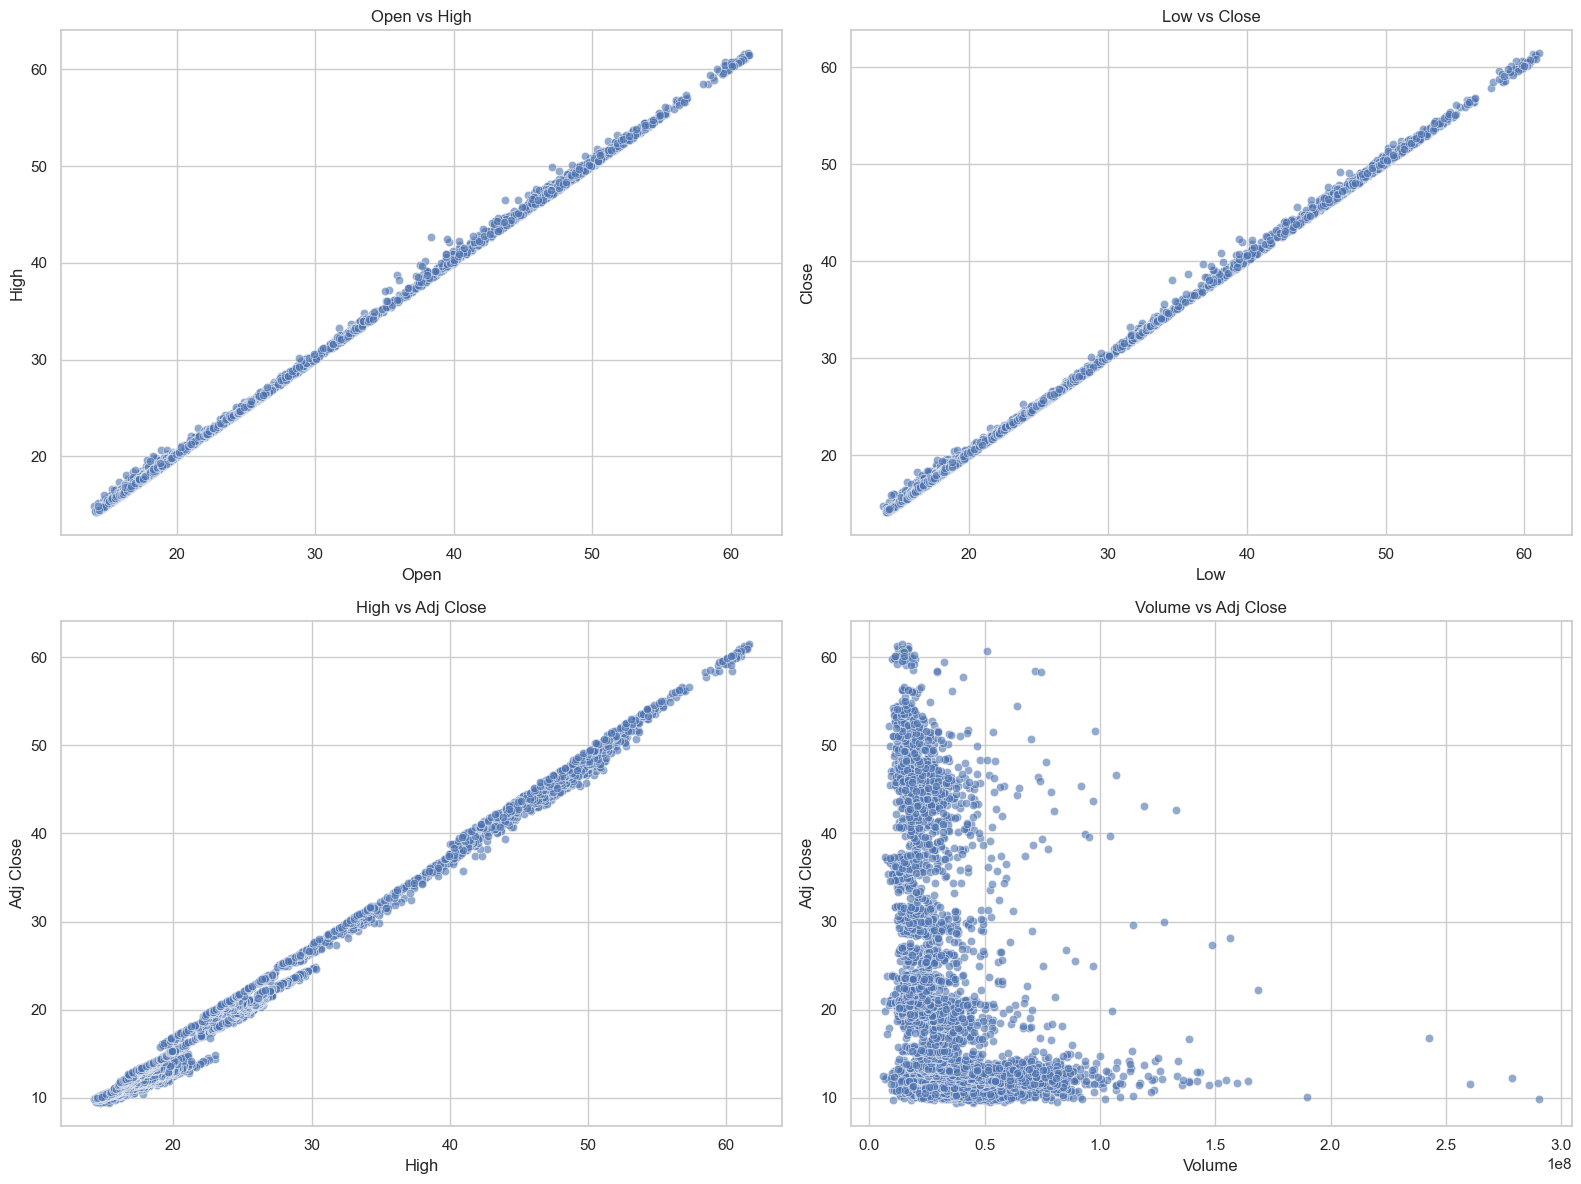

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['Open'], y=df_cleaned['High'], alpha=0.6)
plt.title('Open vs High')

plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['Low'], y=df_cleaned['Close'], alpha=0.6)
plt.title('Low vs Close')

plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['High'], y=df_cleaned['Adj Close'], alpha=0.6)
plt.title('High vs Adj Close')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['Volume'], y=df_cleaned['Adj Close'], alpha=0.6)
plt.title('Volume vs Adj Close')

plt.tight_layout()
plt.show()


**Стандартизация данных для кластеризации**



In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cleaned)


**Агломеративная (иерархическая) кластеризация**


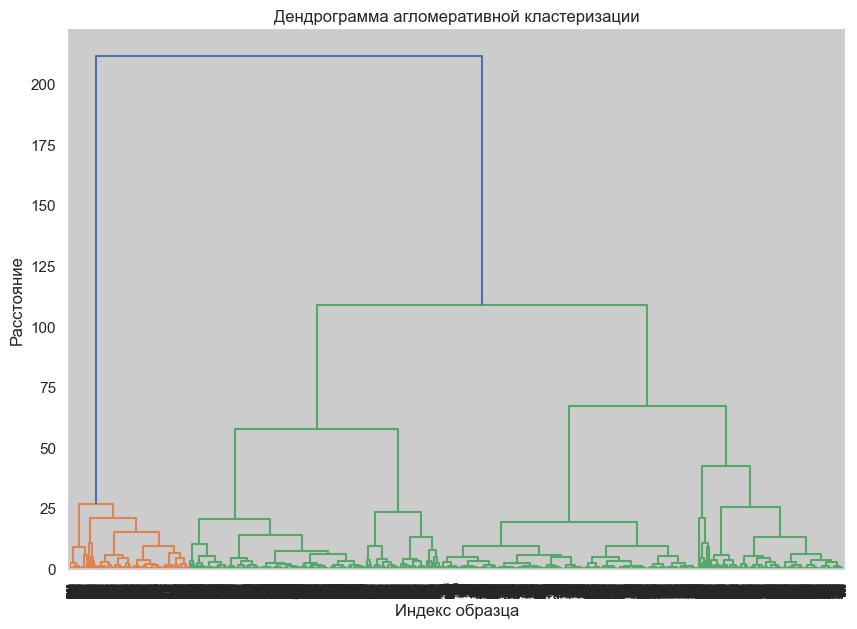

[13 13 13 ...  1  1  1]


In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Дендрограмма агломеративной кластеризации')
plt.xlabel('Индекс образца')
plt.ylabel('Расстояние')
plt.show()

# Получение результатов кластеризации с заданным порогом
result = fcluster(linkage_matrix, t=10, criterion='distance')
print(result)  # Вывод результатов кластеризации


**Визуализация распределения кластеров**


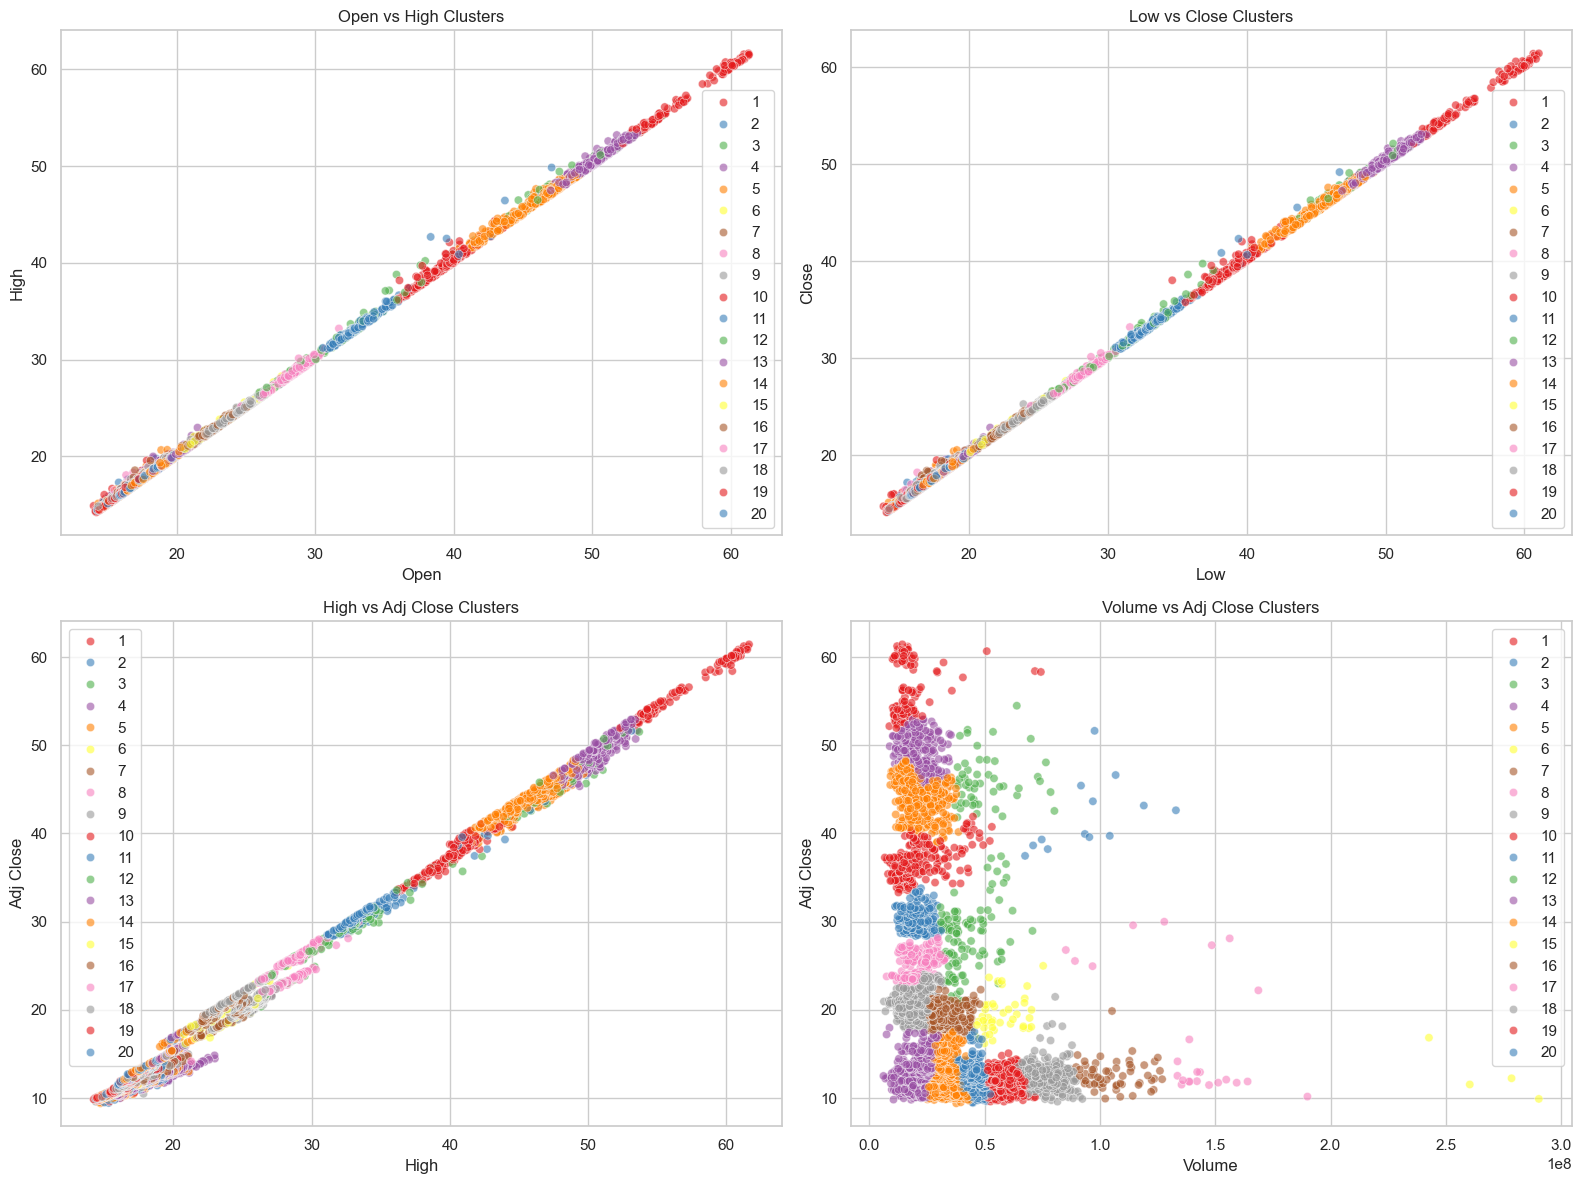

In [6]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['Open'], y=df_cleaned['High'], hue=result, palette='Set1', alpha=0.6)
plt.title('Open vs High Clusters')

plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['Low'], y=df_cleaned['Close'], hue=result, palette='Set1', alpha=0.6)
plt.title('Low vs Close Clusters')

plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['High'], y=df_cleaned['Adj Close'], hue=result, palette='Set1', alpha=0.6)
plt.title('High vs Adj Close Clusters')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['Volume'], y=df_cleaned['Adj Close'], hue=result, palette='Set1', alpha=0.6)
plt.title('Volume vs Adj Close Clusters')

plt.tight_layout()
plt.show()



**KMeans (неиерархическая кластеризация) для сравнения**


Центры кластеров:
 [[1.76367212e+01 1.78216288e+01 1.74494147e+01 1.76355079e+01
  1.23626925e+01 3.93726001e+07]
 [4.68041860e+01 4.71914073e+01 4.64368902e+01 4.68130050e+01
  4.52526313e+01 2.24991882e+07]
 [2.65805223e+01 2.67680688e+01 2.64133213e+01 2.65956796e+01
  2.26497465e+01 2.25562105e+07]]


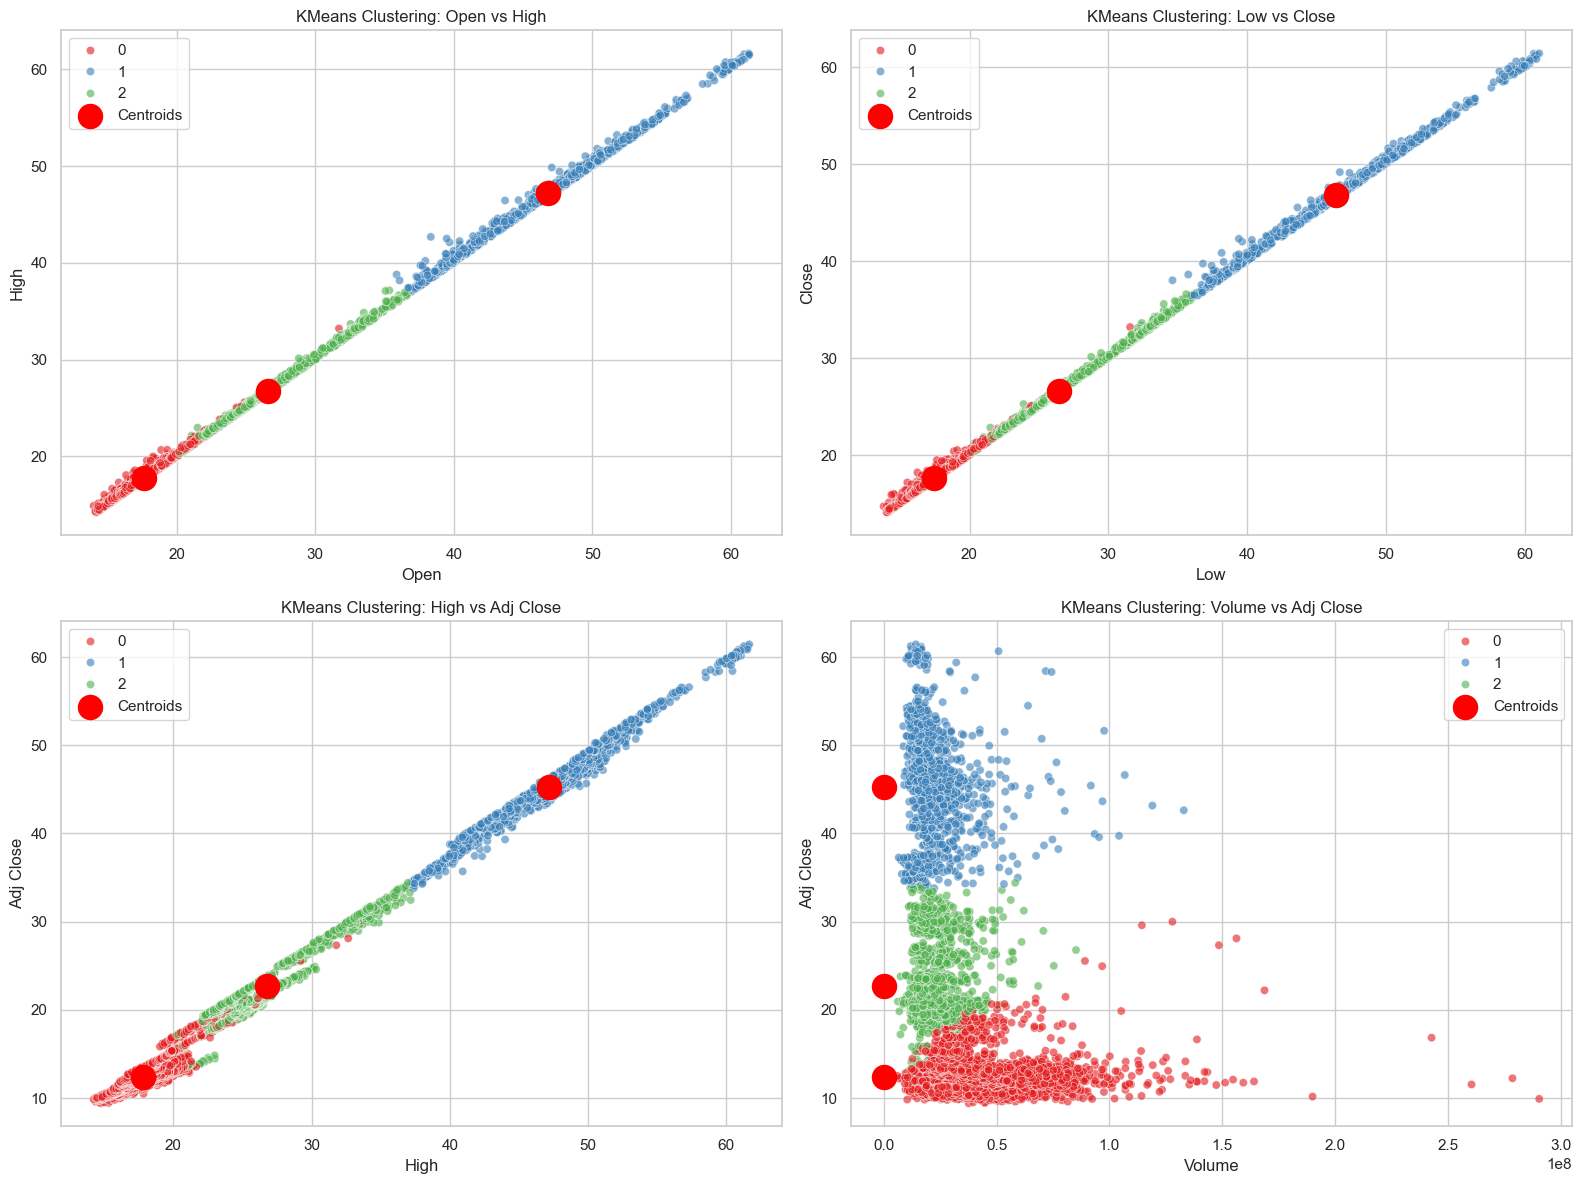

In [15]:
from sklearn.cluster import KMeans

random_state = 9
kmeans = KMeans(n_clusters=3, random_state=random_state)
labels = kmeans.fit_predict(data_scaled)
centers = kmeans.cluster_centers_

# Отображение центроидов
centers = scaler.inverse_transform(centers)  # Обратная стандартизация
print("Центры кластеров:\n", centers)

# Визуализация результатов кластеризации KMeans
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['Open'], y=df_cleaned['High'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Open vs High')
plt.legend()

plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['Low'], y=df_cleaned['Close'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 2], centers[:, 3], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Low vs Close')
plt.legend()

plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['High'], y=df_cleaned['Adj Close'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 1], centers[:, 4], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: High vs Adj Close')
plt.legend()

plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['Volume'], y=df_cleaned['Adj Close'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 3], centers[:, 4], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Volume vs Adj Close')
plt.legend()

plt.tight_layout()
plt.show()


**PCA для визуализации сокращенной размерности**


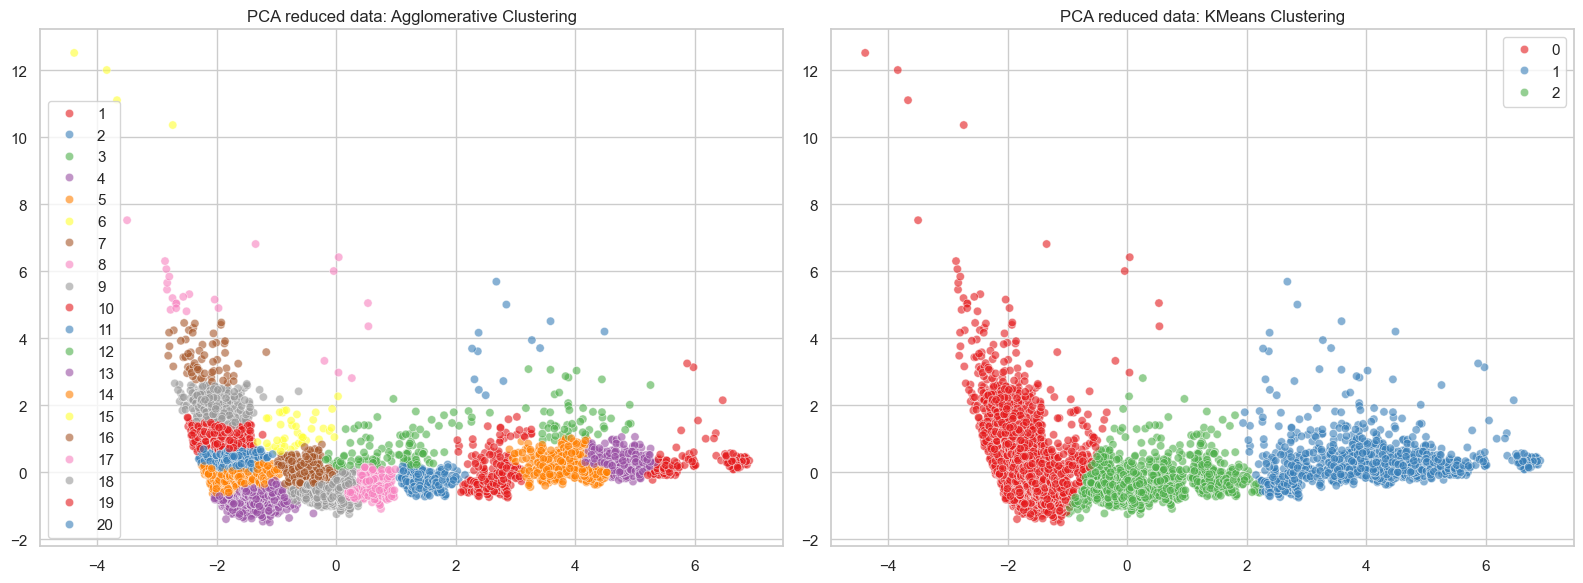

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

# Визуализация сокращенных данных
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=result, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: Agglomerative Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: KMeans Clustering')

plt.tight_layout()
plt.show()


**Анализ инерции для метода локтя (метод оценки суммы квадратов расстояний)**


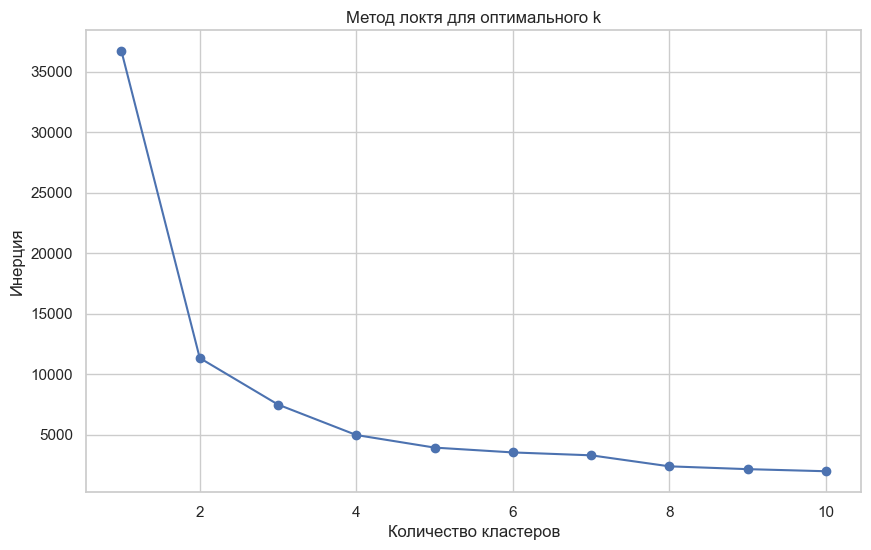

In [9]:
inertias = []
clusters_range = range(1, 11)
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertias, marker='o')
plt.title('Метод локтя для оптимального k')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()


**Расчет коэффициентов силуэта**


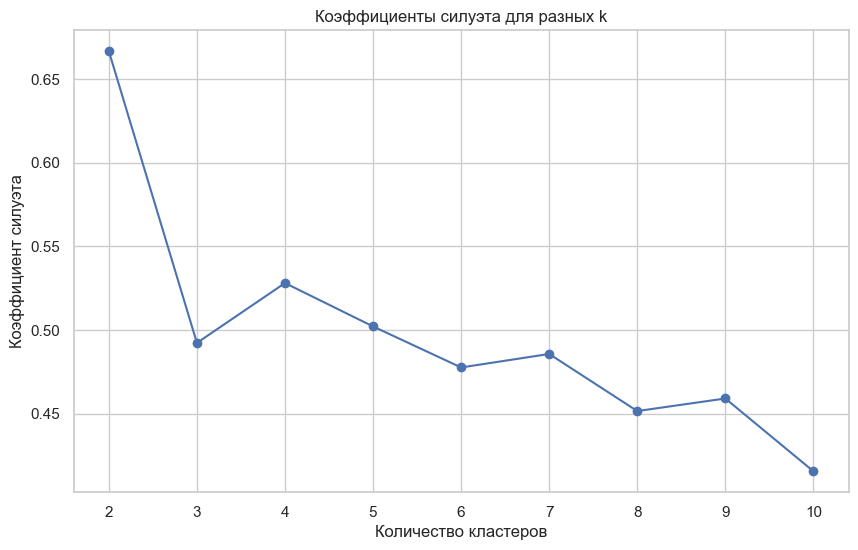

In [10]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in clusters_range[1:]:  
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Построение диаграммы значений силуэта
plt.figure(figsize=(10, 6))
plt.plot(clusters_range[1:], silhouette_scores, marker='o')
plt.title('Коэффициенты силуэта для разных k')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.grid(True)
plt.show()

Средний коэффициент силуэта: 0.466


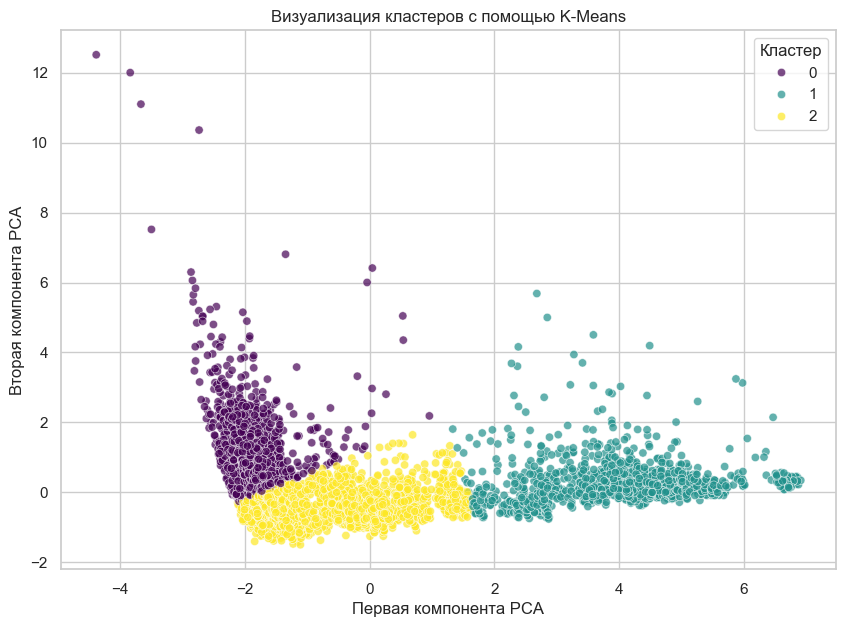

In [13]:
from sklearn.decomposition import PCA

# Применение K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  
df_clusters = kmeans.fit_predict(data_scaled)

# Оценка качества кластеризации
silhouette_avg = silhouette_score(data_scaled, df_clusters)
print(f'Средний коэффициент силуэта: {silhouette_avg:.3f}')

# Визуализация кластеров
pca = PCA(n_components=2)
df_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_clusters, palette='viridis', alpha=0.7)
plt.title('Визуализация кластеров с помощью K-Means')
plt.xlabel('Первая компонентa PCA')
plt.ylabel('Вторая компонентa PCA')
plt.legend(title='Кластер', loc='upper right')
plt.show()

Средний коэффициент силуэта, равный 0.466, указывает на умеренно хорошую кластеризацию.